# Cancer Prediction Using Machine Learning

    Cancer prediction using machine learning involves leveraging advanced algorithms to analyze medical data and predict the likelihood of cancer in patients. This approach aims to enhance early detection, enabling timely interventions and better patient outcomes

## Bussiness Problem

**Problem Statement:** Healthcare providers want to predict which patients are at risk of developing cancer in the near future.

**Objective:** Develop a predictive model to identify patients at risk of cancer, allowing for early intervention and improved patient outcomes.

**Constraints:**

- **Data Quality and Availability:** Access to high-quality, comprehensive medical datasets is essential.

- **Imbalanced Dataset:** There are fewer instances of cancer compared to non-cancer cases.

- **Real-Time Prediction:** The model should provide predictions in a timely manner for proactive medical intervention.

- **Regulatory Compliance:** Ensuring patient data privacy and adherence to healthcare regulations.

**Patients:** By identifying individuals at high risk for cancer early, patients can receive timely medical attention and preventive care, improving their chances of successful treatment and survival.

**Healthcare Providers:** Doctors, nurses, and medical staff can leverage predictive models to enhance diagnostic accuracy, create personalized treatment plans, and monitor patient progress more effectively.

**Researchers:** Medical researchers can use machine learning models to analyze vast datasets, uncover new insights into cancer biology, and develop innovative treatment strategies.

**Hospitals and Clinics:** Healthcare institutions can optimize resource allocation, reduce operational costs, and improve patient outcomes by implementing predictive analytics.

**Insurance Companies:** Insurers can use predictive models to assess risk more accurately, design better insurance products, and incentivize preventive care, ultimately reducing healthcare costs.

**Pharmaceutical Companies:** Drug developers can identify suitable candidates for clinical trials, predict treatment efficacy, and accelerate the development of new cancer therapies.

**Public Health Officials:** Government and public health agencies can use predictive analytics to design targeted cancer prevention and awareness programs, ultimately improving population health outcomes.

## Data Understanding

### Required Library

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'Data/cancer_prediction_data.csv')

In [4]:
df.head()

,Age,Gender,Tumor_Size,Tumor_Grade,Symptoms_Severity,Family_History,Smoking_History,Alcohol_Consumption,Exercise_Frequency,Cancer_Present
0,62.0,Male,9.763242,High,Mild,Yes,Former Smoker,Moderate,NaN,0
1,33.0,Male,7.946532,NaN,Moderate,Yes,Current Smoker,NaN,Regularly,1
2,33.0,Female,NaN,High,Moderate,No,Current Smoker,High,Rarely,1
3,58.0,Female,NaN,Low,Mild,NaN,Current Smoker,NaN,Rarely,1
4,NaN,Female,1.384231,Medium,Mild,No,Former Smoker,Moderate,Occasionally,1


#### Data Discription

'Age                   : Numerical value representing the age of the patient (in years).   
Gender                : Categorical value indicating the gender of the patient (e.g., Male, Female, Other).  
Tumor_Size            :  Numerical value representing the size of the tumor, typically measured in millimeters (mm) or centimeters (cm).  
Tumor_Grade           : Categorical value indicating the grade of the tumor, which reflects how abnormal the cancer cells look under a microscope (e.g., High, Low, Medium).  
Symptoms_Severity     : Numerical or categorical value representing the severity of the patient's symptoms (e.g., Mild, Moderate, Severe).   
Family_History        : Categorical value indicating whether there is a family history of cancer (e.g., Yes, No).  
Smoking_History       : Categorical value indicating the patient's smoking history (e.g., Never Smoked, Former Smoker, Current Smoker).  
Alcohol_Consumption   : Categorical or numerical value representing the patient's alcohol consumption (e.g., Moderate, High, Low).  
Exercise_Frequency    : Numerical or categorical value representing how often the patient exercises (e.g., None, Occasionally, Regularly).  
Cancer_Present        : Binary value indicating whether the patient has cancer (e.g., 0 for No, 1 for Yes).  '

## Exploratory Data analysis

In [10]:
df.head()

,Age,Gender,Tumor_Size,Tumor_Grade,Symptoms_Severity,Family_History,Smoking_History,Alcohol_Consumption,Exercise_Frequency,Cancer_Present
0,62.0,Male,9.763242,High,Mild,Yes,Former Smoker,Moderate,NaN,0
1,33.0,Male,7.946532,NaN,Moderate,Yes,Current Smoker,NaN,Regularly,1
2,33.0,Female,NaN,High,Moderate,No,Current Smoker,High,Rarely,1
3,58.0,Female,NaN,Low,Mild,NaN,Current Smoker,NaN,Rarely,1
4,NaN,Female,1.384231,Medium,Mild,No,Former Smoker,Moderate,Occasionally,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1811 non-null   float64
 1   Gender               1794 non-null   object 
 2   Tumor_Size           1829 non-null   float64
 3   Tumor_Grade          1807 non-null   object 
 4   Symptoms_Severity    1815 non-null   object 
 5   Family_History       1792 non-null   object 
 6   Smoking_History      1821 non-null   object 
 7   Alcohol_Consumption  1321 non-null   object 
 8   Exercise_Frequency   1805 non-null   object 
 9   Cancer_Present       2000 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 156.4+ KB


In [12]:
df.describe()

,Age,Tumor_Size,Cancer_Present
count,1811.000000,1829.000000,2000.000000
mean,49.267808,5.133781,0.491500
std,17.361243,2.781335,0.500053
min,20.000000,0.507471,0.000000
25%,35.000000,2.700941,0.000000
50%,49.000000,5.079521,0.000000
75%,64.000000,7.588271,1.000000
max,79.000000,9.998166,1.000000


In [13]:
df.describe(include='object')

,Gender,Tumor_Grade,Symptoms_Severity,Family_History,Smoking_History,Alcohol_Consumption,Exercise_Frequency
count,1794,1807,1815,1792,1821,1321,1805
unique,2,3,3,2,3,3,4
top,Female,Low,Moderate,Yes,Former Smoker,High,Never
freq,930,619,614,897,624,446,467


### Univariate

In [50]:
def univariate(x,*plots,data=df):
    r = int(len(plots)//3)+1
    fig,ax = plt.subplots(nrows=r,ncols=3,figsize=(r*10,r*5),constrained_layout=True)
    ax = ax.flatten()
    def hist(x,data):
        sns.histplot(data=data[x],ax=ax[num],bins=10,color="g",kde=True)
        #ax[0].set_title(f"Histogram for {x}")
    
    def scatter(x,data):
        sns.scatterplot(data[x],ax=ax[num])
        #ax[1].set_title(f"Scatter Plot for {x}")
        
    def box(x,data):
        sns.boxplot(data[x],ax=ax[num],color="orange")
        #ax[2].set_title(f"BoxPlot for {x}")

    def violen(x,data):
        sns.violinplot(data[x],ax=ax[num],color="tomato")
        #ax[3].set_title(f"Violen for {x}")
        
    def bar(x,data):
        sns.barplot(data[x].value_counts(),ax=ax[num])

    def line(x,data):
            # Time Series 
            fig,ax = plt.subplots(1,2,figsize=(16,4))
            axes=ax.flatten()
            sns.lineplot(data[x].dt.year.value_counts(),ax=axes[0])
            sns.lineplot(data[x][data["Date"].dt.year==2023].dt.month.value_counts(),ax=axes[1])
            fig.suptitle("Time series Data")
            axes[0].set_title("Yearly Based")
            ax[1].set_title("Monthly Based")
            plt.plot()
    if __name__ == "__main__":
        if (data[x].dtype == "int64") or (data[x].dtype == "float64"): 
            print("Statistical Description:")
            print(data[x].describe())
            print("variance :".ljust(25),round(np.var(data[x]),2))
            print("Standered Deviation :".ljust(25),round(np.std(data[x]),2))
            print("Range :".ljust(25),np.max(data[x])-np.min(data[x]))
            print("InterQuatile Range :".ljust(25),np.percentile(data[x],75)-np.percentile(data[x],25))
        elif data[x].dtype == "datetime64[ns]":
            pass
        else:
            print(data[x].describe(include="object"))
        num = 0
        
        for i in plots:
            if i.lower() == "hist":
                hist(x,data)
                num += 1
            elif i.lower() == "scatter":
                scatter(x,data)
                num += 1
            elif i.lower() == "box":
                box(x,data)
                num += 1
            elif i.lower() == "violen":
                violen(x,data)
                num += 1
            elif i.lower() == "bar":
                bar(x,data)
                num+=1
            elif i.lower() == "line":
                line(x,data)
        [fig.delaxes(a) for a in ax if not a.has_data()]    
        fig.suptitle(f"univariate analysis of {x}",fontsize=16)
        plt.plot()
            

In [51]:
df.columns

Index(['Age', 'Gender', 'Tumor_Size', 'Tumor_Grade', 'Symptoms_Severity',
       'Family_History', 'Smoking_History', 'Alcohol_Consumption',
       'Exercise_Frequency', 'Cancer_Present'],
      dtype='object')

Statistical Description:
count    1811.000000
mean       49.267808
std        17.361243
min        20.000000
25%        35.000000
50%        49.000000
75%        64.000000
max        79.000000
Name: Age, dtype: float64
variance :                301.25
Standered Deviation :     17.36
Range :                   59.0
InterQuatile Range :      nan


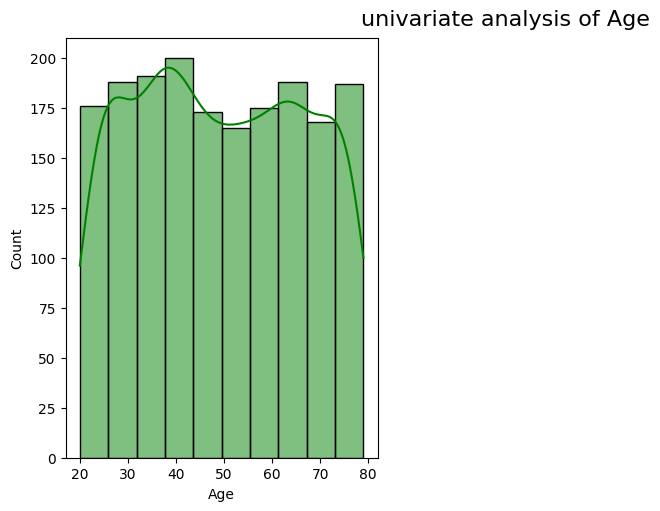

In [52]:
univariate('Age','hist')

In [21]:
numaric = ['Age', 'Tumor_Size']
ordinal = ['Tumor_Grade', 'Symptoms_Severity', 'Alcohol_Consumption', 'Exercise_Frequency']
nominal = ['Gender','Smoking_History',]

## Pipeline

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [8]:
numaric_preprocesssing = Pipeline([('Mean Imputer',SimpleImputer(strategy='mean')),
                                  ('Scaling',StandardScaler())])
numaric_preprocesssing

Pipeline(steps=[('Mean Imputer', SimpleImputer()),
                ('Scaling', StandardScaler())])

In [12]:
ordinal_preprocesssing = Pipeline([('mode Imputer',SimpleImputer(strategy='most_frequent')),
                                  ('Encoding',OrdinalEncoder(dtype=int))])
ordinal_preprocesssing

Pipeline(steps=[('mode Imputer', SimpleImputer(strategy='most_frequent')),
                ('Encoding', OrdinalEncoder(dtype=<class 'int'>))])

In [22]:
nominal_preprocesssing = Pipeline([('mode Imputer',SimpleImputer(strategy='most_frequent')),
                                  ('Encoding',OneHotEncoder(dtype=int))])
nominal_preprocesssing

Pipeline(steps=[('mode Imputer', SimpleImputer(strategy='most_frequent')),
                ('Encoding', OneHotEncoder(dtype=<class 'int'>))])

In [23]:
preprocessing = ColumnTransformer([('Numarical Transformer',numaric_preprocesssing,numaric),
                                  ('Ordinal Transformer',ordinal_preprocesssing,ordinal),
                                  ('Nominal Transformer',nominal_preprocesssing,ordinal)],
                                 remainder='passthrough')

In [24]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numarical Transformer',
                                 Pipeline(steps=[('Mean Imputer',
                                                  SimpleImputer()),
                                                 ('Scaling',
                                                  StandardScaler())]),
                                 ['Age', 'Tumor_Size']),
                                ('Ordinal Transformer',
                                 Pipeline(steps=[('mode Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoding',
                                                  OrdinalEncoder(dtype=<class 'int'>))]),
                                 ['Tumor_Grade', 'Symptoms_Severity',
                                  'Alcohol_Consumption',
                                  'Exercise_Frequency']),
                                ('Nominal Transformer',
                                 Pipeline(steps=[('mode Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoding',
                                                  OneHotEncoder(dtype=<class 'int'>))]),
                                 ['Tumor_Grade', 'Symptoms_Severity',
                                  'Alcohol_Consumption',
                                  'Exercise_Frequency'])])

In [25]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [27]:
DT = Pipeline([('Preprocess',preprocessing,
               ('Model',DecisionTreeClassifier()))])

In [28]:
DT

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numarical Transformer',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tumor_Size']),
                                                 ('Ordinal Transformer',
                                                  Pipeline(steps=[('mode '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoding',
                                                                   OrdinalEncoder(dtype=<class 'int'>))]),
                                                  ['Tumor_Grade',
                                                   'Symptoms_Severity',
                                                   'Alcohol_Consumption',
                                                   'Exercise_Frequency']),
                                                 ('Nominal Transformer',
                                                  Pipeline(steps=[('mode '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoding',
                                                                   OneHotEncoder(dtype=<class 'int'>))]),
                                                  ['Tumor_Grade',
                                                   'Symptoms_Severity',
                                                   'Alcohol_Consumption',
                                                   'Exercise_Frequency'])]),
                 ('Model', DecisionTreeClassifier()))])